In [1]:
import sys
sys.path.append('../')

from activation import *
from loss import *
from linear import * 
from encapsulage import *
from utils import *

import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import seaborn as sns
from sklearn.metrics import confusion_matrix

def onehot(x): 
    out = [0] * 10
    out[x] = 1
    return out

In [2]:
# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalisation
X_train /= 255
X_test /= 255

# One-hot encoding
X_train = X_train[:5000]
y_train = y_train[:5000]
X_test = X_test[:1000]
y_test = y_test[:1000]
y_train = np.array([onehot(x) for x in y_train])
y_test = np.array([onehot(x) for x in y_test])  

# Hyperparamètres
input_dim = X_train.shape[1]
hidden_dim1 = 128
hidden_dim2 = 64
output_dim = 10

batch_size = 200
epochs = 1000
gradient_step = 1e-4

# Modèle
net = Sequentiel([])
net.add_module(Linear(input_dim, hidden_dim1))
net.add_module(TanH())
net.add_module(Linear(hidden_dim1, hidden_dim2))
net.add_module(TanH())
net.add_module(Linear(hidden_dim2, output_dim))

# Perte
loss = CrossEntropyLossSoftmax()

# Entraînement
optim = Optim(net, loss, gradient_step)
lloss = optim.SGD(X_train, y_train, batch_size, epochs)


100%|██████████| 1000/1000 [02:30<00:00,  6.66it/s]


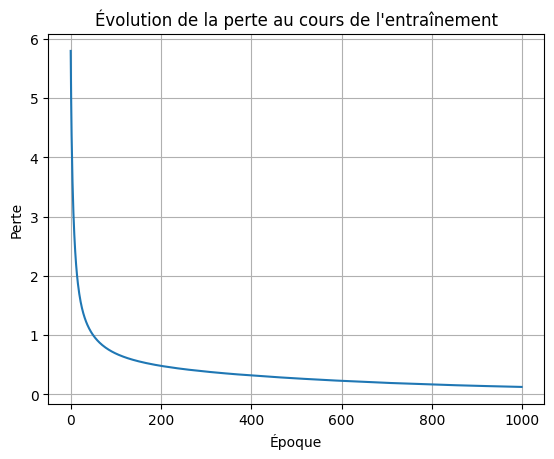

In [3]:
# Affichage de la perte
plot_loss(lloss)

Shape of y_hat_test: (1000, 10)
First few entries of y_hat_test: [[ 1.34175232e+00 -6.23768686e+00  3.82863201e+00  5.33973302e+00
   1.53848080e-01 -7.84861390e+00 -6.96244249e+00  1.45315199e+01
  -6.13935284e-02  3.00705263e+00]
 [-3.66344147e+00 -4.69671820e+00  2.49480736e+00 -2.47169064e-01
  -5.56811817e+00  4.97566514e+00  2.00520652e+00 -1.05737100e+01
   1.17006362e+00 -4.76791232e+00]
 [-2.45690504e+00  1.26940776e+01  2.87574955e+00 -8.59082172e-02
  -6.90562933e+00 -4.04613628e+00  4.47418141e+00  6.42433952e-01
  -1.00878946e-01 -6.93531227e+00]
 [ 1.13178319e+01 -2.90407941e+00 -3.67795010e+00 -5.63294289e+00
   7.74904957e-01  4.54787697e-01 -1.24282198e-02  7.54680547e+00
  -3.69948410e+00 -1.66246941e+00]
 [-2.57912857e+00 -6.29200874e+00 -3.52874011e+00 -8.02426268e+00
   1.10780849e+01 -4.10422740e+00  3.69099786e+00 -1.47126096e+00
  -1.28660356e+00  6.96074236e+00]]
Shape of y_test: (1000, 10)
First few entries of y_test: [[0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0

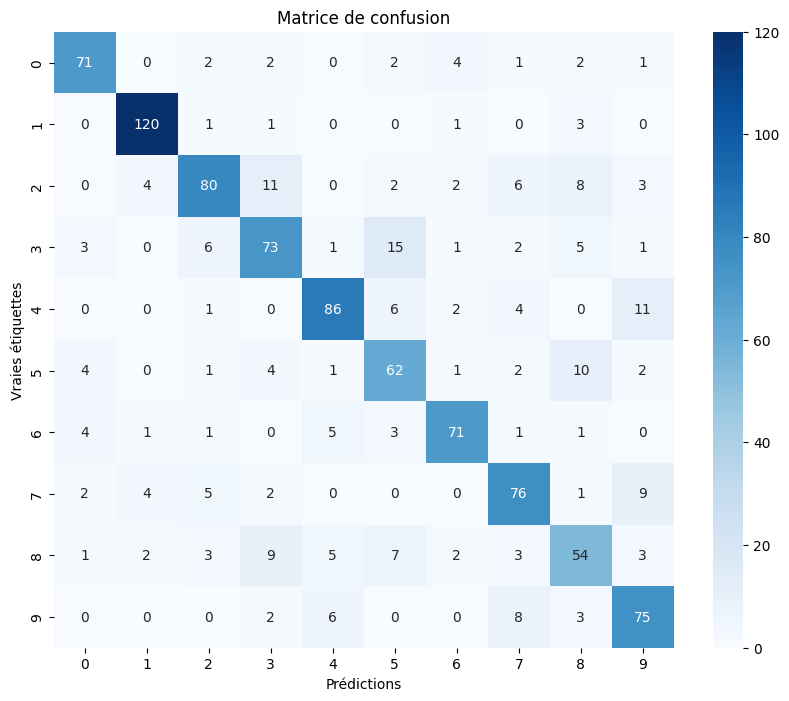

In [4]:
# prédictions sur le jeu de test
y_hat_test = net.forward(X_test)[-1] 
print("Shape of y_hat_test:", y_hat_test.shape)  
print("First few entries of y_hat_test:", y_hat_test[:5])  

# encodage one-hot de y_test
print("Shape of y_test:", y_test.shape)  
print("First few entries of y_test:", y_test[:5])  

# calcule les prédictions
y_test_pred = np.argmax(y_hat_test, axis=1)
print("Shape of y_test_pred:", y_test_pred.shape)  
print("First few entries of y_test_pred:", y_test_pred[:5])  

plot_confusion_matrice(y_test, y_test_pred)

In [5]:
# calcule et affiche l'exactitude sur le jeu de test
test_accuracy = calculate_accuracy(y_test, y_hat_test)
print(f'Exactitude sur le jeu de test: {test_accuracy * 100:.2f}%')

Exactitude sur le jeu de test: 76.80%
